<a href="https://colab.research.google.com/github/KaiJun-SIT/Deep_learning-emotion/blob/main/AAI3001_small_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Small Project: Emotion Recognition**

### **Tasks**: Solve a classification problem using the knowledge acquired from coursework and online resources.

In the lectures and labs, we have explained applied AI for image processing. This small project will focus on speech. You can imagine that the input features of speech resemble those of image input.
The aim of this project is to encourage you to adapt the learned concepts from conventional image processing to audio processing, as the techniques are quite generalizable.

You are allowed to search or use additional data and pre-trained models.


Some suggestions (but not limit to):
* different NNs
* different pooling layers to get time-invariant feature map..
* data augmentation: [copy-paste, noise augmentation](https://arxiv.org/pdf/2010.14602)..
* using Pre-trained SSL models: [wav2lm, Hubert](https://arxiv.org/pdf/2202.03896), [emotion2vec](https://arxiv.org/abs/2312.15185)..
* more from you :)

Note that **the baseline performance is just 54.53% (show after running [17] code cell) the SOTA is above 75%, a lot for you to implement!**



```
| Batch Size  | GPU       | Test-UAR | Time Taken |
|-------------|-----------|----------|------------|
| 256         | A100-40GB | 54.04%   | 30 mins    |
| 128         | T4-15GB   | 54.53%   | < 1 hour    |

```



How to get new ideas to improve performence?
* listen to some misclassified audio clips and try to do more analysis, this helps you gain a deeper understanding of the problem and come up with an idea
* check papers, always prioritize highly-cited ones and those that provide code

### **Submission rules**:



1.   Submit  "label.csv" to [kaggle](https://www.kaggle.com/t/dd096ee9ffeb4bcbb858a8d01da11d0d) to see your real-time ranking, note that the maximum number of submissions per day is 1.

  * You should not modify your prediction files manually
  * Do not share codes or prediction files with any living creatures.
  * Your final grade x 0.9 and 0 pt for this HW if you violate any of the above rules.

<img src="https://drive.google.com/uc?id=1VasPqFMYodx-NE5JQhQk5GHp-mxZIh5v" alt="altertext" width="400">

2.   Submit your **notebook code with all outputs**  to the [small-project](https://xsite.singaporetech.edu.sg/d2l/lms/dropbox/admin/mark/folder_submissions_files.d2l?d2l_isfromtab=1&db=66115&ou=144676) Dropbox by October 10 (week6, Thursday). Everyone must submit their own notebook. If you are working in a group, the notebook can be the same for all members.

**IMPORTANT**: the notebook filename is

```
"name1_name2_name*_testUA_{testUA_yourscript_achieved, 4 digits after the decimal point}.ipynb",
e.g. xiaoxiaomiao_mahesh_testUA_0.5404.ipynb

```
3. Submit your **presentation slides** to the small-project Dropbox by October 10 (week6, Thursday). Suggest to prepare no more than 3 presentation slides, the content should includes all your modifications, e.g. data, model, loss.. and show the results changes accordingly, better to have some analysis.. control your presentation within 5 minutes.
---





### **Evaluation rules**:

1. Performance Ranking
2. Method Nolvelty
3. Presentation @ Week6 Lab




### Current model is a simplified version from "3-D Convolutional Recurrent Neural Networks With Attention Model for Speech Emotion Recognition"

![altertext](https://drive.google.com/uc?id=1bHrsMSjWKf1XgmCshPrSU81fVSsNhfP4)

[Paper link](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8421023&casa_token=AGqWGVSS5lAAAAAA:cM6X58aNcHVZmsVC1r_ZxawguzlzMHMhxZzsLdxdYf7ogidcBmUmMHhgwKH6H33TGBGRXV1XUQYo0A&tag=1)

[Github link](https://github.com/xuanjihe/speech-emotion-recognition/tree/master)



# Download Data

We use [IEMOCAP dataset](https://paperswithcode.com/dataset/iemocap), and select four emotions (**N**eutral, **H**appy, **S**ad, **A**ngry) from 5 sessions. Each session features 2 speakers (1 male and 1 female), and each speaker has 4 emotional speech recordings.

* The IDs are: ['Ses01F', 'Ses01M', 'Ses02F', 'Ses02M', 'Ses03F', 'Ses03M', 'Ses04F', 'Ses04M', 'Ses05F', 'Ses05M'].
* We choose 'Ses01F' as the test set, which includes the four emotional speech recordings from session 01 with the female speaker.
* We choose 'Ses01M' as the validation set, which includes the four emotional speech recordings from session 01 with the male speaker.
* The remaining sessions are used as the training data. Each emotion has the following number of training samples:
[['A', 874], ['H', 1358], ['N', 1324], ['S', 890]]


In [ ]:
! nvidia-smi #make sure you choose GPU, the default type is CPU, click change runtime type, set hardware accelerator to *GPU

Wed Sep  4 05:56:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!gdown 13Gue1-EwvpzK2bZEFpTSGKdB5oDhUjbf
!unzip -o small-project.zip -d small-project

Streaming output truncated to the last 5000 lines.
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses03F_script01_1_F050.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01M_script01_3_M004.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses05F_script02_2_F015.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses04M_impro08_M024.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01F_script03_2_M011.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01F_script01_1_F029.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses05M_impro08_M022.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses04M_script02_2_F016.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01F_script03_2_M005.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses03F_script0

#Import Packages


In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import soundfile as sound
import datetime
import sys, subprocess
import math
import random
import librosa
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR
import torchaudio
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from tqdm import tqdm
import logging
import time

from sklearn.metrics import confusion_matrix, classification_report, recall_score
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchaudio import functional as audioF
from torchaudio.compliance import kaldi

# Some Utility Functions
**Fixes random number generator seeds for reproducibility.**

In [ ]:
def setup_seed(seed=2021):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


**Helper functions to pre-process the training data from raw Fbank features of each utterance.**

The sample rate of speech is 16K (the number of samples per second is 16000)

The input length for each utterance is different, cut them to 6s if larger than 6s, copy speech until 6s if less than 6s


In [ ]:
class Pad_trunc_wav(nn.Module):
    def __init__(self, max_len: int = 6*16000):
        super(Pad_trunc_wav, self).__init__()
        self.max_len = max_len
    def forward(self,x):
        shape = x.shape
        length = shape[1]
        if length < self.max_len:
            multiple = self.max_len//length+1
            x_tmp = torch.cat((x,)*multiple, axis=1)
            x_new = x_tmp[:,0:self.max_len]
        else:
            x_new = x[:,0:self.max_len]
        return x_new


In [ ]:
class Deltas_Deltas_FBank(nn.Module):
    #(…, freq, time)
    def __init__(self):
        super(Deltas_Deltas_FBank, self).__init__()
    def forward(self,x):
        # x: time*freq
        x = x.permute(1,0).unsqueeze(0)
        delta = audioF.compute_deltas(x)
        delta2 = audioF.compute_deltas(delta)
        x_out = torch.cat((x,delta,delta2), 0).permute(0,2,1)
        # x_out: 3*freq*time -> 3*time*freq
        return x_out


# Dataset

In [ ]:
class Mydataset(Dataset):
    def __init__(self, mode='train', max_len=6, seed=42):
        self.mode = mode
        data_all = pd.read_csv('small-project/small-project/IEMOCAP_4.tsv',sep='\t')
        SpkNames = np.unique(data_all['speaker']) # only 10 speakers, (['Ses01F', 'Ses01M', 'Ses02F', 'Ses02M', 'Ses03F', 'Ses03M','Ses04F', 'Ses04M', 'Ses05F', 'Ses05M']
        self.data_info = self.split_dataset(data_all, SpkNames)
        self.get_audio_dir_path = os.path.join('small-project/small-project/IEMOCAP_full_release_audio/')
        self.pad_trunc = Pad_trunc_wav(max_len*16000)
        self.transform = Deltas_Deltas_FBank()
        # label is emotion type:  A: Angry  H: Happy, N: Natural, S: Sad
        self.label = self.data_info['label'].astype('category').cat.codes.values

        self.ClassNames = np.unique(self.data_info['label'])
        self.NumClasses = len(self.ClassNames)
        if mode == 'train':
          print("Each emotion has the following number of training samples:")
          print([[self.ClassNames[i], (self.label == i).sum()] for i in range(self.NumClasses)])
        self.weight = 1/torch.tensor([(self.label==i).sum() for i in range(self.NumClasses)]).float()

    def get_classname(self):

        return  self.ClassNames

    def split_dataset(self, df_all, speakers):
        spk_len = len(speakers)
        test_idx = np.array(df_all['speaker']==speakers[0]) # audio from 'Ses01F' as test set
        val_idx = np.array(df_all['speaker']==speakers[1]) #  audio from 'Ses01M' as val set
        train_idx = True^(test_idx+val_idx)
        train_data_info = df_all[train_idx].reset_index(drop=True)
        val_data_info = df_all[val_idx].reset_index(drop=True)
        test_data_info = df_all[test_idx].reset_index(drop=True)

        if self.mode == 'train':
            data_info = train_data_info
        elif self.mode == 'val':
            data_info = val_data_info
        elif self.mode == 'test':
            data_info = test_data_info
        else:
            data_info = df_all
        return data_info

    def pre_process(self, wav):
        wav = self.pad_trunc(wav)
        return wav

    def extract_fbank(self, wav, sample_rate):
        wav = wav * (1 << 15)
        if sample_rate!=16000:
            # if sample rate is not 16k, change (transform) to 16k
            wav = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(wav)
        # Extract Raw Fbank feature, the Fbank feature dimension is 80
        spec = kaldi.fbank(wav,num_mel_bins=80,frame_length=25,frame_shift=10,sample_frequency=16000,high_freq=8000,low_freq=0,window_type='hamming')
        return spec

    def __len__(self):
        return len(self.data_info)

    def __getitem__(self, idx):
        wav, sample_rate = torchaudio.load(os.path.join(self.get_audio_dir_path, self.data_info.filename[idx]) + '.wav')
        wav = self.pre_process(wav)
        spec = self.transform(self.extract_fbank(wav, sample_rate)).float()
        label = self.label[idx]
        label = np.array(label)
        label = label.astype('float').reshape(1)
        label = torch.Tensor(label).long().squeeze()
        return spec, label, self.data_info.filename[idx]


# Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.nn.functional as F

class Mymodel(nn.Module):
    def __init__(self, feature_size=80, h_dims=256, emotion_cls=4):
        super(Mymodel, self).__init__()
        self.bn0 = nn.BatchNorm2d(feature_size)

        self.conv_block1 = self.ConvBlock5x5(in_channels=3, out_channels=64)
        self.conv_block2 = self.ConvBlock5x5(in_channels=64, out_channels=128)
        self.conv_block3 = self.ConvBlock5x5(in_channels=128, out_channels=256)
        self.conv_block4 = self.ConvBlock5x5(in_channels=256, out_channels=512)

        self.att_block = self.AttBlock(512, h_dims, activation='linear')

        self.fc1 = nn.Linear(h_dims, h_dims // 2)
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.bn = nn.BatchNorm1d(h_dims // 2)
        self.fc2 = nn.Linear(h_dims // 2, emotion_cls)
        self.outlayer = nn.LogSoftmax(dim=-1)

    class AttBlock(nn.Module):
        def __init__(self, n_in, n_out, activation='linear', temperature=1.):
            super(Mymodel.AttBlock, self).__init__()

            self.activation = activation
            self.temperature = temperature
            self.att = nn.Conv1d(in_channels=n_in, out_channels=n_out, kernel_size=1, stride=1, padding=0, bias=True)
            self.cla = nn.Conv1d(in_channels=n_in, out_channels=n_out, kernel_size=1, stride=1, padding=0, bias=True)

            self.bn_att = nn.BatchNorm1d(n_out)

        def forward(self, x):
            norm_att = torch.softmax(torch.clamp(self.att(x), -10, 10), dim=-1)
            cla = self.nonlinear_transform(self.cla(x))
            x = torch.sum(norm_att * cla, dim=2)
            return x, norm_att, cla

        def nonlinear_transform(self, x):
            if self.activation == 'linear':
                return x
            elif self.activation == 'sigmoid':
                return torch.sigmoid(x)

    class ConvBlock5x5(nn.Module):
        def __init__(self, in_channels, out_channels):
            super(Mymodel.ConvBlock5x5, self).__init__()
            self.conv1 = nn.Conv2d(in_channels=in_channels,
                                   out_channels=out_channels,
                                   kernel_size=(5, 5), stride=(1, 1),
                                   padding=(2, 2), bias=False)
            self.bn1 = nn.BatchNorm2d(out_channels)

        def forward(self, input, pool_size=(2, 2), pool_type='avg'):
            x = input
            x = F.relu_(self.bn1(self.conv1(x)))
            if pool_type == 'max':
                x = F.max_pool2d(x, kernel_size=pool_size)
            elif pool_type == 'avg':
                x = F.avg_pool2d(x, kernel_size=pool_size)
            elif pool_type == 'avg+max':
                x1 = F.avg_pool2d(x, kernel_size=pool_size)
                x2 = F.max_pool2d(x, kernel_size=pool_size)
                x = x1 + x2
            else:
                raise Exception('Incorrect argument!')
            return x

    def forward(self, inputs):
        x = inputs.transpose(1, 3)
        x = self.bn0(x)
        x = x.transpose(1, 3)
        x = self.conv_block1(x, pool_size=(2, 2), pool_type='max')
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv_block2(x, pool_size=(2, 2), pool_type='max')
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv_block3(x, pool_size=(2, 2), pool_type='max')
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv_block4(x, pool_size=(2, 2), pool_type='max')
        x = F.dropout(x, p=0.2, training=self.training)

        x = torch.mean(x, dim=3)  # (batch_size, channels, time)
        #att_output, norm_att, cla = self.att_block(x) #
        x = torch.sum(x, dim=2)
        emo_ebd = x
        x = self.dropout(self.activation(self.bn(self.fc1(x))))
        pred = self.outlayer(self.fc2(x))

        return pred, emo_ebd


# Hyper-parameters

In [ ]:
# Setup environment and arguments
seed = 2024 # random seed
batch_size = 128  # batch size, reduce batch size, if you get out of memory problem
epochs = 100  # the number of training epoch
max_len = 6 # the input length for training
lr = 1e-3  # learning rate
loss_type = 'CE' #loss function
optimizer_type = 'Adam' # optimizer, can try Adam or others

# Define Save Log Function

In [ ]:
def get_logger(filename, verbosity=1, name=None):
    level_dict = {0: logging.DEBUG, 1: logging.INFO, 2: logging.WARNING}
    formatter = logging.Formatter("[%(asctime)s][%(filename)s][line:%(lineno)d][%(levelname)s] %(message)s")
    logger = logging.getLogger(name)
    logger.setLevel(level_dict[verbosity])

    fh = logging.FileHandler(filename, "w")
    fh.setFormatter(formatter)
    logger.addHandler(fh)

    sh = logging.StreamHandler()
    sh.setFormatter(formatter)
    logger.addHandler(sh)

    return logger


# Training

In [ ]:
def train(model, device, train_loader, criterion, optimizer, epoch, logger):
    model.train()
    logger.info('start training')

    lr = optimizer.param_groups[0]["lr"]
    logger.info('lr: {:.5f}'.format(lr))

    correct = 0

    for batch, data in tqdm(enumerate(train_loader)):
        spec, emo_label,_ = data
        spec, emo_label = spec.to(device), emo_label.to(device)
        optimizer.zero_grad()

        emo_output,_ = model(spec)
        loss = criterion(emo_output, emo_label)

        loss.backward()
        nn.utils.clip_grad_norm_([param for param in model.parameters() if param.requires_grad], max_norm=10, norm_type=2)
        optimizer.step()

        pred = emo_output.argmax(dim=1, keepdim=True)
        correct += pred.eq(emo_label.view_as(pred)).sum().item()

        if batch % 20 == 0:
            logger.info('Epoch: {} [{}/{} ({:.0f}%)]\t loss={:.5f}\t '.format(epoch , batch * len(emo_label), len(train_loader.dataset), 100. * batch / len(train_loader), loss.item()))

    logger.info('Train set Accuracy: {}/{} ({:.3f}%)'.format(correct, len(train_loader.dataset), 100. * correct / (len(train_loader.dataset))))
    logger.info('finish training!')
    return loss


# Testing

In [ ]:
import pandas as pd
def test(model, device, dataset_type, val_loader, criterion, logger, target_names):
    model.eval()
    test_loss = 0
    correct = 0
    logger.info('testing on {}'.format(dataset_type))

    pred_all = np.array([],dtype=np.int64)
    true_all = np.array([],dtype=np.int64)
    nameIDs = np.array([],dtype=str)

    embs_all = []  # Collect all embeddings

    with torch.no_grad():
        for spec, label, nameID in tqdm(val_loader):
            #spec, label = [x.to(device) for x in spec], label.to(device)
            spec, label = spec.to(device), label.to(device)
            output,embs = model(spec)
            test_loss += criterion(output, label).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()

            pred = output.data.max(1)[1].cpu().numpy()
            true = label.data.cpu().numpy()
            pred_all = np.append(pred_all,pred)
            true_all = np.append(true_all,true)
            nameIDs = np.append(nameIDs,nameID)

            embs_all.append(embs.cpu().numpy())  # Collect embeddings

    test_loss /= len(val_loader.dataset)
    acc = 100. * correct / len(val_loader.dataset)

    logger.info('{}: Average loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(dataset_type,
        test_loss, correct, len(val_loader.dataset), acc))

    if dataset_type == 'test':
      con_mat = confusion_matrix(true_all,pred_all)
      cls_rpt = classification_report(true_all,pred_all,target_names=target_names,digits=3)
      logger.info('Confusion Matrix:\n{}\n'.format(con_mat))
      logger.info('Classification Report:\n{}\n'.format(cls_rpt))
      # Check if lengths match
      if len(nameIDs) == len(pred_all):
          # Create DataFrame with the combined data
          df = pd.DataFrame({
              'ID': nameIDs,
              'Predict': pred_all,
          })

          # Save DataFrame to a CSV file
          df.to_csv('label.csv', index=False)
          print("Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.")
      else:
          print(f"Length mismatch: nameIDs length is {len(nameIDs)}, pred_all length is {len(pred_all)}")
      #np.savez('results.npz', true_all=true_all, pred_all=pred_all)


    UA = recall_score(true_all,pred_all,average='macro')
    WA = recall_score(true_all,pred_all,average='weighted')


    # Concatenate all embeddings
    embs_all = np.concatenate(embs_all, axis=0)

    return test_loss,UA,WA, embs_all, true_all


# Early Stopping

In [ ]:
def early_stopping(network,savepath,metricsInEpochs,gap):
    best_metric_inx=np.argmax(metricsInEpochs)
    if best_metric_inx+1==len(metricsInEpochs):
        best = os.path.join(savepath, 'best_epoch_{}.pt'.format(best_metric_inx+1))
        torch.save(network,best)
        return False
    elif (len(metricsInEpochs)-best_metric_inx >= gap):
        return True
    else:
        return False

In [ ]:
savedir = 'exp'
setup_seed(seed)
stamp = datetime.datetime.now().strftime('%y%m%d%H%M')
tag = stamp + '_' + str(epochs)
try:
    os.makedirs(savedir)
except OSError:
    if not os.path.isdir(savedir):
        raise

logpath = savedir + "/exp.log"
modelpath = savedir + "/model.pt"

use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

# Dataloader

In [ ]:
train_set = Mydataset(mode='train', max_len=max_len,  seed=seed)
val_set = Mydataset( mode='val', max_len=max_len, seed=seed)
test_set = Mydataset( mode='test', max_len=max_len, seed=seed)

drop_last = True if len(train_set)%batch_size<2 else False
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=drop_last)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)

Each emotion has the following number of training samples:
[['A', 874], ['H', 1358], ['N', 1324], ['S', 890]]


# Define Model, Optimizer, Learning Rate Decay Schedure

In [ ]:
model = Mymodel(feature_size=80, h_dims=512, emotion_cls=train_set.NumClasses).to(device)
#model = torch.load('exp/model.pt') # load a saved model
if loss_type == 'CE':
    criterion = nn.NLLLoss()
    criterion_test = nn.NLLLoss(reduction='sum')
else:
    raise NameError

if optimizer_type == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=1e-5)
elif optimizer_type == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=lr)
else:
    raise NameError

logger = get_logger(logpath)
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=15, factor=0.1, verbose=True)


In [ ]:

val_UA_list = []
test_UA_dic = {}
test_WA_dic = {}

train_losses = []
val_losses = []

for epoch in range(1, epochs+1):
    start = time.time()
    train_loss = train(model, device, train_loader, criterion, optimizer, epoch, logger)
    train_losses.append(train_loss)

    time.sleep(0.003)
    val_loss,val_UA,_,_,_= test(model, device, 'val', val_loader, criterion_test, logger, train_set.ClassNames)
    val_losses.append(val_loss)
    end = time.time()
    duration = end-start
    val_UA_list.append(val_UA)
    if early_stopping(model,savedir,val_UA_list,gap=20):
        print('val loss has not been decreased for 20 epochs, stop training \n')
        break

    scheduler.step(val_UA)
    logger.info("-"*50)
    logger.info('Epoch {:2d} | Time {:5.4f} sec | Valid Loss {:5.4f} '.format(epoch, duration, val_loss))
    logger.info("-"*50)
    time.sleep(0.003)



INFO:root:start training
[2024-09-02 08:59:35,869][<ipython-input-10-c645943283be>][line:3][INFO] start training
INFO:root:lr: 0.00100
[2024-09-02 08:59:35,874][<ipython-input-10-c645943283be>][line:6][INFO] lr: 0.00100
0it [00:00, ?it/s]INFO:root:Epoch: 1 [0/4446 (0%)]	 loss=1.46574	 
[2024-09-02 08:59:51,986][<ipython-input-10-c645943283be>][line:26][INFO] Epoch: 1 [0/4446 (0%)]	 loss=1.46574	 
20it [00:51,  1.52s/it]INFO:root:Epoch: 1 [2560/4446 (57%)]	 loss=1.01765	 
[2024-09-02 09:00:33,570][<ipython-input-10-c645943283be>][line:26][INFO] Epoch: 1 [2560/4446 (57%)]	 loss=1.01765	 
35it [01:24,  2.43s/it]
INFO:root:Train set Accuracy: 2196/4446 (49.393%)
[2024-09-02 09:01:00,974][<ipython-input-10-c645943283be>][line:28][INFO] Train set Accuracy: 2196/4446 (49.393%)
INFO:root:finish training!
[2024-09-02 09:01:00,976][<ipython-input-10-c645943283be>][line:29][INFO] finish training!
INFO:root:testing on val
[2024-09-02 09:01:00,981][<ipython-input-11-79a11d45054c>][line:6][INFO] tes

val loss has not been decreased for 20 epochs, stop training 



# Use best model on val set to compute performance on test set and save model



**Test UAR - unweighted average recall, the baseline is 0.5404. We use this value to rank your system. Please work on improving this value**

In [ ]:
test_loss,test_UA,test_WA, embs, true_labels = test(model, device,'test', test_loader, criterion_test, logger, train_set.ClassNames)
logger.info('test UA: {}  @epoch: {}'.format(test_UA, epoch)) #unweighted average recall
#logger.info('test WA: {}  @epoch: {}'.format(test_WA,epoch))  # weighted average recall
torch.save(model, modelpath)

INFO:root:testing on test
[2024-09-02 10:02:22,447][<ipython-input-11-79a11d45054c>][line:6][INFO] testing on test
100%|██████████| 5/5 [00:09<00:00,  1.93s/it]
INFO:root:test: Average loss: 1.7655, Accuracy: 286/528 (54.167%)

[2024-09-02 10:02:32,117][<ipython-input-11-79a11d45054c>][line:34][INFO] test: Average loss: 1.7655, Accuracy: 286/528 (54.167%)

INFO:root:Confusion Matrix:
[[87 22 29  9]
 [26 77 12 17]
 [ 3 39 80 49]
 [ 0  8 28 42]]

[2024-09-02 10:02:32,132][<ipython-input-11-79a11d45054c>][line:40][INFO] Confusion Matrix:
[[87 22 29  9]
 [26 77 12 17]
 [ 3 39 80 49]
 [ 0  8 28 42]]

INFO:root:Classification Report:
              precision    recall  f1-score   support

           A      0.750     0.592     0.662       147
           H      0.527     0.583     0.554       132
           N      0.537     0.468     0.500       171
           S      0.359     0.538     0.431        78

    accuracy                          0.542       528
   macro avg      0.543     0.545     

Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA>0.5404.


# Visulazation for better analysis

## Plot Training and Validation Loss per Epoch

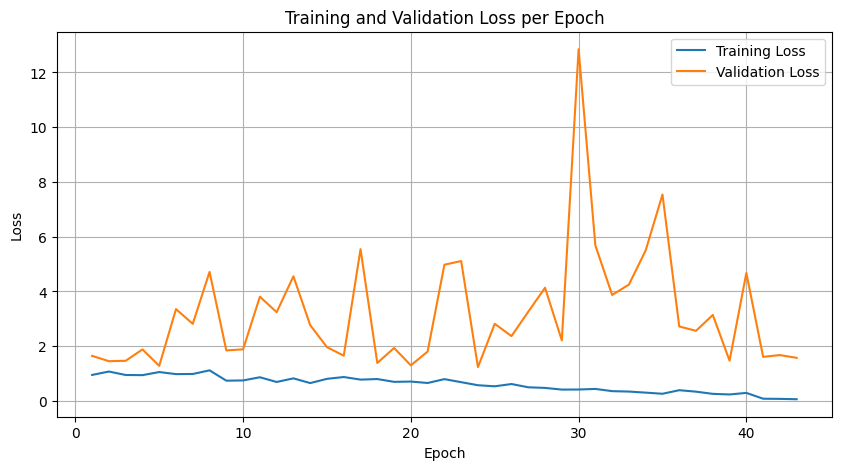

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
train_losses_tensor = torch.tensor(train_losses)  # Convert list back to tensor if needed
val_losses_tensor = torch.tensor(val_losses)
train_losses = train_losses_tensor.cpu().numpy()
val_losses = val_losses_tensor.cpu().numpy()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


## Plot TSNE on test set

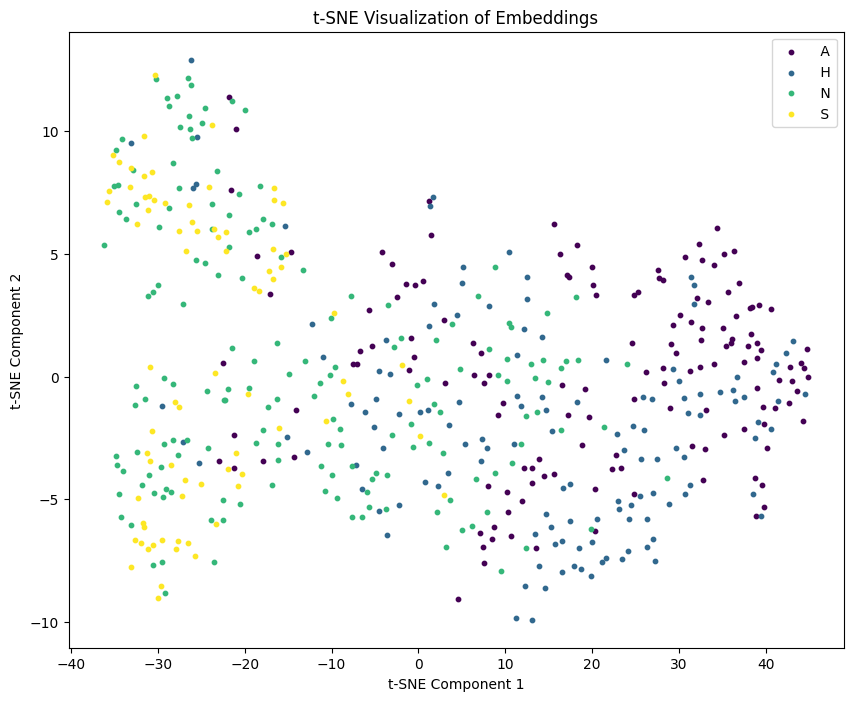

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming true_labels and embs are already defined
classname=test_set.get_classname()
# Encode labels
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=0)
embs_2d = tsne.fit_transform(embs)

# Define the color map and labels
cmap = plt.get_cmap('viridis', len(label_encoder.classes_))
labels = label_encoder.classes_

# Plotting
plt.figure(figsize=(10, 8))

# Plot each class separately
for i, label in enumerate(labels):
    idx = true_labels_encoded == i
    plt.scatter(embs_2d[idx, 0], embs_2d[idx, 1], c=[cmap(i)], label=f' {classname[label]}', s=10)

# Add the legend
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Embeddings')
plt.show()
